In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

(400, 2) (400,)


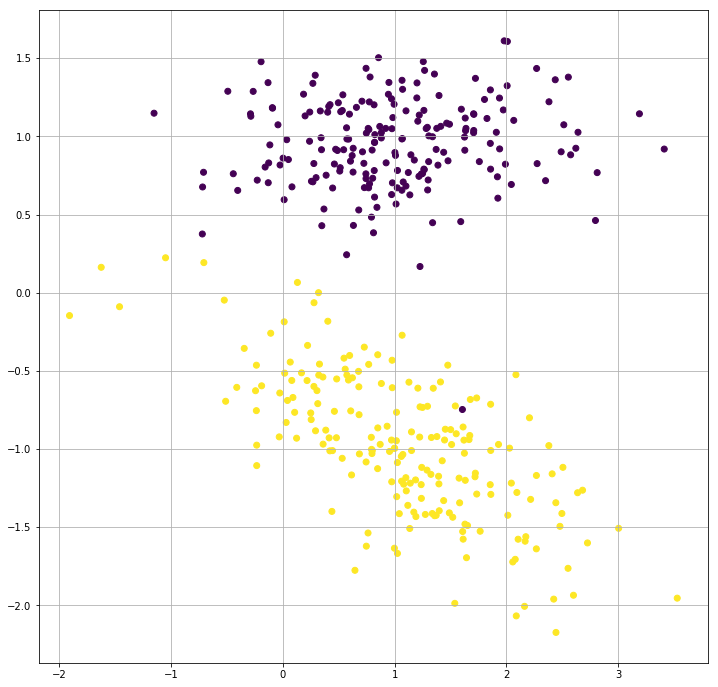

In [63]:
X,Y = make_classification(n_samples=400,n_features=2,n_informative=2,
                          n_classes=2,n_clusters_per_class=1,
                          n_redundant=0,random_state=3)
print(X.shape,Y.shape)
# Convert Y data into (-1,1) rather (0,1)
Y[Y == 0] = -1
plt.figure(figsize=(12,12))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.grid(True)
plt.show()

In [40]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.w = 0
    
    def hingLoss(self,X,Y,w,b):
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(X[i],w.T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self, X, Y,maxItr, batch_size = 100, learning_rate = 0.001):
        n_features = X.shape[1]
        n_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        w = np.zeros((1,n_features))
        b = 0.0
        
        losses = []
        
        for i in range(maxItr):
            l = self.hingLoss(X,Y,w,b)
            losses.append(l)
            # id ranges from 0 to n_samples
            # and then randomly shuffled.
            # [0,1,2,3,4...] to [56,21,42,3,..]
            ids = np.arange(n_samples)
            np.random.shuffle(ids)
            # batch starting index 
            for batch_start in range(0,n_samples,batch_size):
                gradw = 0
                gradb = 0
                # loop for current batch from start to batch size
                for j in range(batch_start,batch_start+batch_size):
                    if j<n_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(X[i],w.T)+b)
                        if ti>=1:
                            gradw += 0
                            gradb += 0
                        elif ti<1:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
            w = w - n*w +n*gradw
            b = b + n*gradb
        self.w = w
        self.b = b
        return w,b,losses
            
            

In [46]:
svm = SVM()
w,b,losses = svm.fit(X,Y,500)
print(w,b)

[[-0.3235625 -2.0462145]] 0.3870000000000003


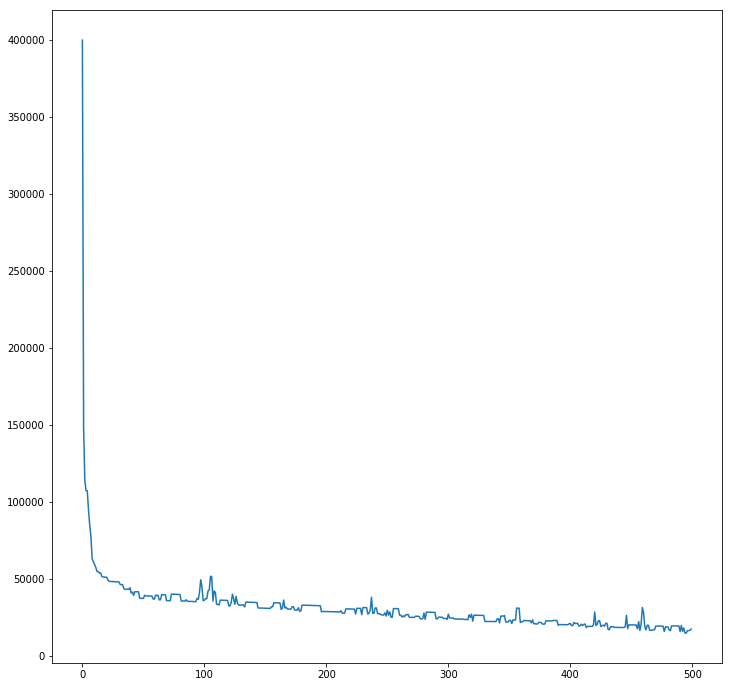

In [64]:
plt.figure(figsize=(12,12))
plt.plot(losses)

In [55]:
def hyperPlane(X,Y,w,b):
    x1 = np.linspace(-2,4,10)
    x2 = -(w[0,0]*x1+b)/w[0,1] # W1*X1+W2*X2 +b = 0
    xp = -(w[0,0]*x1+b-1)/w[0,1] # W1*X1+W2*Xp +b = 1
    xn = -(w[0,0]*x1+b+1)/w[0,1] # W1*X1+W2*Xn +b = -1
    plt.figure(figsize=(12,12))
    plt.plot(x1,x2,label = "HYPERPLANE - W1*X1+W2*X2 +b = 0")
    plt.plot(x1,xp,label = "HYPERPLANE - W1*X1+W2*Xp +b = 1")
    plt.plot(x1,xn,label = "HYPERPLANE - W1*X1+W2*Xn +b = -1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    

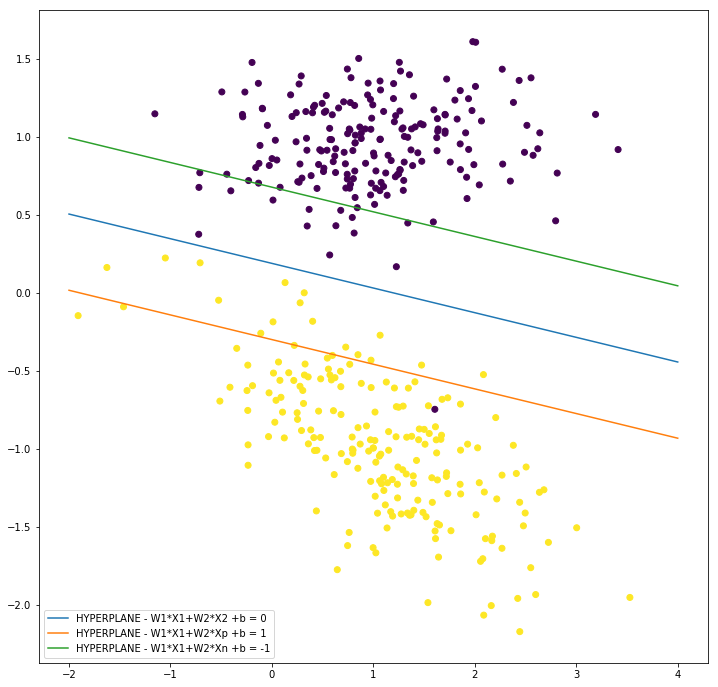

In [56]:
hyperPlane(X,Y,w,b)

In [60]:
# WHEN C IS VERY LARGE...
svm = SVM(C=1000)
w,b,losses = svm.fit(X,Y,500)
print(w,b)

[[ -8.21965399 -32.30402873]] 5.0


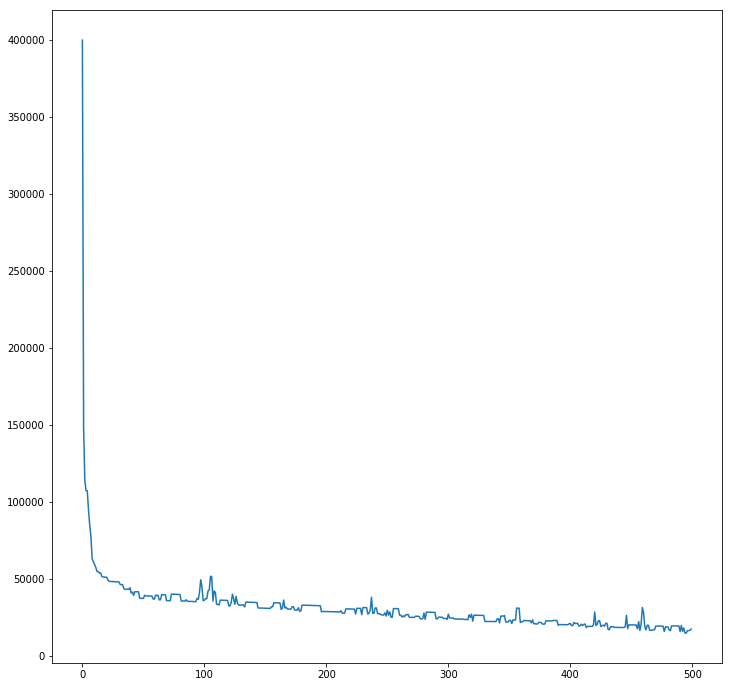

In [65]:
plt.figure(figsize=(12,12))
plt.plot(losses)

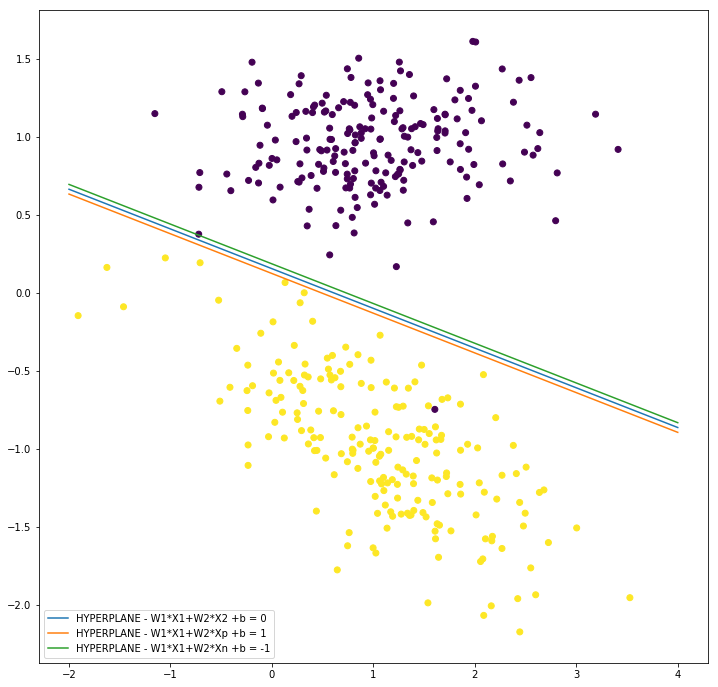

In [62]:
hyperPlane(X,Y,w,b)